In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load the CSV files
cases_df = pd.read_csv('cases_malaysia.csv')
vax_df = pd.read_csv('vax_malaysia.csv')

print("Cases Malaysia Dataset:")
print(f"Shape: {cases_df.shape}")
print(f"Date range: {cases_df['date'].min()} to {cases_df['date'].max()}")
print(f"Columns: {list(cases_df.columns)}")
print("\nFirst few rows:")
print(cases_df.head())

print("\n" + "="*50)

print("\nVaccination Malaysia Dataset:")
print(f"Shape: {vax_df.shape}")
print(f"Date range: {vax_df['date'].min()} to {vax_df['date'].max()}")
print(f"Columns: {list(vax_df.columns)}")
print("\nFirst few rows:")
print(vax_df.head())

Cases Malaysia Dataset:
Shape: (1954, 31)
Date range: 2020-01-25 to 2025-05-31
Columns: ['date', 'cases_new', 'cases_import', 'cases_recovered', 'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost', 'cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80', 'cluster_import', 'cluster_religious', 'cluster_community', 'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre', 'cluster_workplace']

First few rows:
         date  cases_new  cases_import  cases_recovered  cases_active  \
0  2020-01-25          4             4                0             4   
1  2020-01-26          0             0                0             4   
2  2020-01-27          0             0                0             4   
3  2020-01-28          0             0                0             4   
4  2020-01-29         

In [5]:
# Convert date columns to datetime
cases_df['date'] = pd.to_datetime(cases_df['date'])
vax_df['date'] = pd.to_datetime(vax_df['date'])

# Filter cases data: 2021-08-26 → 2022-02-26
# Extract cases_new column
cases_start_date = '2021-08-26'
cases_end_date = '2022-02-26'

cases_filtered = cases_df[
    (cases_df['date'] >= cases_start_date) & 
    (cases_df['date'] <= cases_end_date)
][['date', 'cases_new']].copy()

print(f"Cases data filtered from {cases_start_date} to {cases_end_date}")
print(f"Filtered cases shape: {cases_filtered.shape}")
print(f"Date range in filtered data: {cases_filtered['date'].min().date()} to {cases_filtered['date'].max().date()}")
print("\nFirst few rows of filtered cases data:")
print(cases_filtered.head())
print(f"\nCases_new statistics:")
print(cases_filtered['cases_new'].describe())

Cases data filtered from 2021-08-26 to 2022-02-26
Filtered cases shape: (185, 2)
Date range in filtered data: 2021-08-26 to 2022-02-26

First few rows of filtered cases data:
          date  cases_new
579 2021-08-26      24599
580 2021-08-27      22070
581 2021-08-28      22597
582 2021-08-29      20579
583 2021-08-30      19268

Cases_new statistics:
count      185.000000
mean      9615.816216
std       7522.124568
min       2342.000000
25%       4262.000000
50%       5806.000000
75%      14345.000000
max      32070.000000
Name: cases_new, dtype: float64


In [6]:
# Filter vaccination data: 2021-07-01 → 2022-01-01
# Extract cumul_full column (cumulative fully vaccinated)
vax_start_date = '2021-07-01'
vax_end_date = '2022-01-01'

vax_filtered = vax_df[
    (vax_df['date'] >= vax_start_date) & 
    (vax_df['date'] <= vax_end_date)
][['date', 'cumul_full']].copy()

print(f"Vaccination data filtered from {vax_start_date} to {vax_end_date}")
print(f"Filtered vaccination shape: {vax_filtered.shape}")
print(f"Date range in filtered data: {vax_filtered['date'].min().date()} to {vax_filtered['date'].max().date()}")
print("\nFirst few rows of filtered vaccination data:")
print(vax_filtered.head())
print(f"\nCumul_full statistics:")
print(vax_filtered['cumul_full'].describe())

Vaccination data filtered from 2021-07-01 to 2022-01-01
Filtered vaccination shape: (185, 2)
Date range in filtered data: 2021-07-01 to 2022-01-01

First few rows of filtered vaccination data:
          date  cumul_full
127 2021-07-01     2429925
128 2021-07-02     2500693
129 2021-07-03     2580136
130 2021-07-04     2661027
131 2021-07-05     2782600

Cumul_full statistics:
count    1.850000e+02
mean     1.799251e+07
std      7.968578e+06
min      2.429925e+06
25%      1.124939e+07
50%      2.105753e+07
75%      2.535596e+07
max      2.566636e+07
Name: cumul_full, dtype: float64


In [ ]:
# Plot 1: Daily New Cases Over Time
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(cases_filtered['date'], cases_filtered['cases_new'], 
         color='red', linewidth=2, alpha=0.8)
plt.title('Daily New COVID-19 Cases in Malaysia\n(Aug 26, 2021 - Feb 26, 2022)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add some statistics annotations
max_cases = cases_filtered['cases_new'].max()
max_date = cases_filtered[cases_filtered['cases_new'] == max_cases]['date'].iloc[0]
plt.annotate(f'Peak: {max_cases:,} cases\n{max_date.strftime("%Y-%m-%d")}', 
             xy=(max_date, max_cases), xytext=(max_date, max_cases + 5000),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

print(f"Peak daily cases: {max_cases:,} on {max_date.strftime('%Y-%m-%d')}")
print(f"Average daily cases: {cases_filtered['cases_new'].mean():.0f}")
print(f"Median daily cases: {cases_filtered['cases_new'].median():.0f}")

In [ ]:
# Plot 2: Cumulative Fully Vaccinated Over Time
plt.figure(figsize=(15, 6))

plt.plot(vax_filtered['date'], vax_filtered['cumul_full'], 
         color='green', linewidth=2, alpha=0.8)
plt.title('Cumulative Fully Vaccinated Population in Malaysia\n(July 1, 2021 - January 1, 2022)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Fully Vaccinated', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Format y-axis to show millions
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Add annotations
start_vax = vax_filtered['cumul_full'].iloc[0]
end_vax = vax_filtered['cumul_full'].iloc[-1]
plt.annotate(f'Start: {start_vax/1e6:.1f}M', 
             xy=(vax_filtered['date'].iloc[0], start_vax), 
             xytext=(vax_filtered['date'].iloc[10], start_vax + 2e6),
             arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.annotate(f'End: {end_vax/1e6:.1f}M', 
             xy=(vax_filtered['date'].iloc[-1], end_vax), 
             xytext=(vax_filtered['date'].iloc[-20], end_vax - 2e6),
             arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

print(f"Vaccination progress from {start_vax/1e6:.1f}M to {end_vax/1e6:.1f}M fully vaccinated")
print(f"Total increase: {(end_vax - start_vax)/1e6:.1f}M people")
print(f"Daily average increase: {(end_vax - start_vax)/len(vax_filtered)/1000:.1f}K people per day")

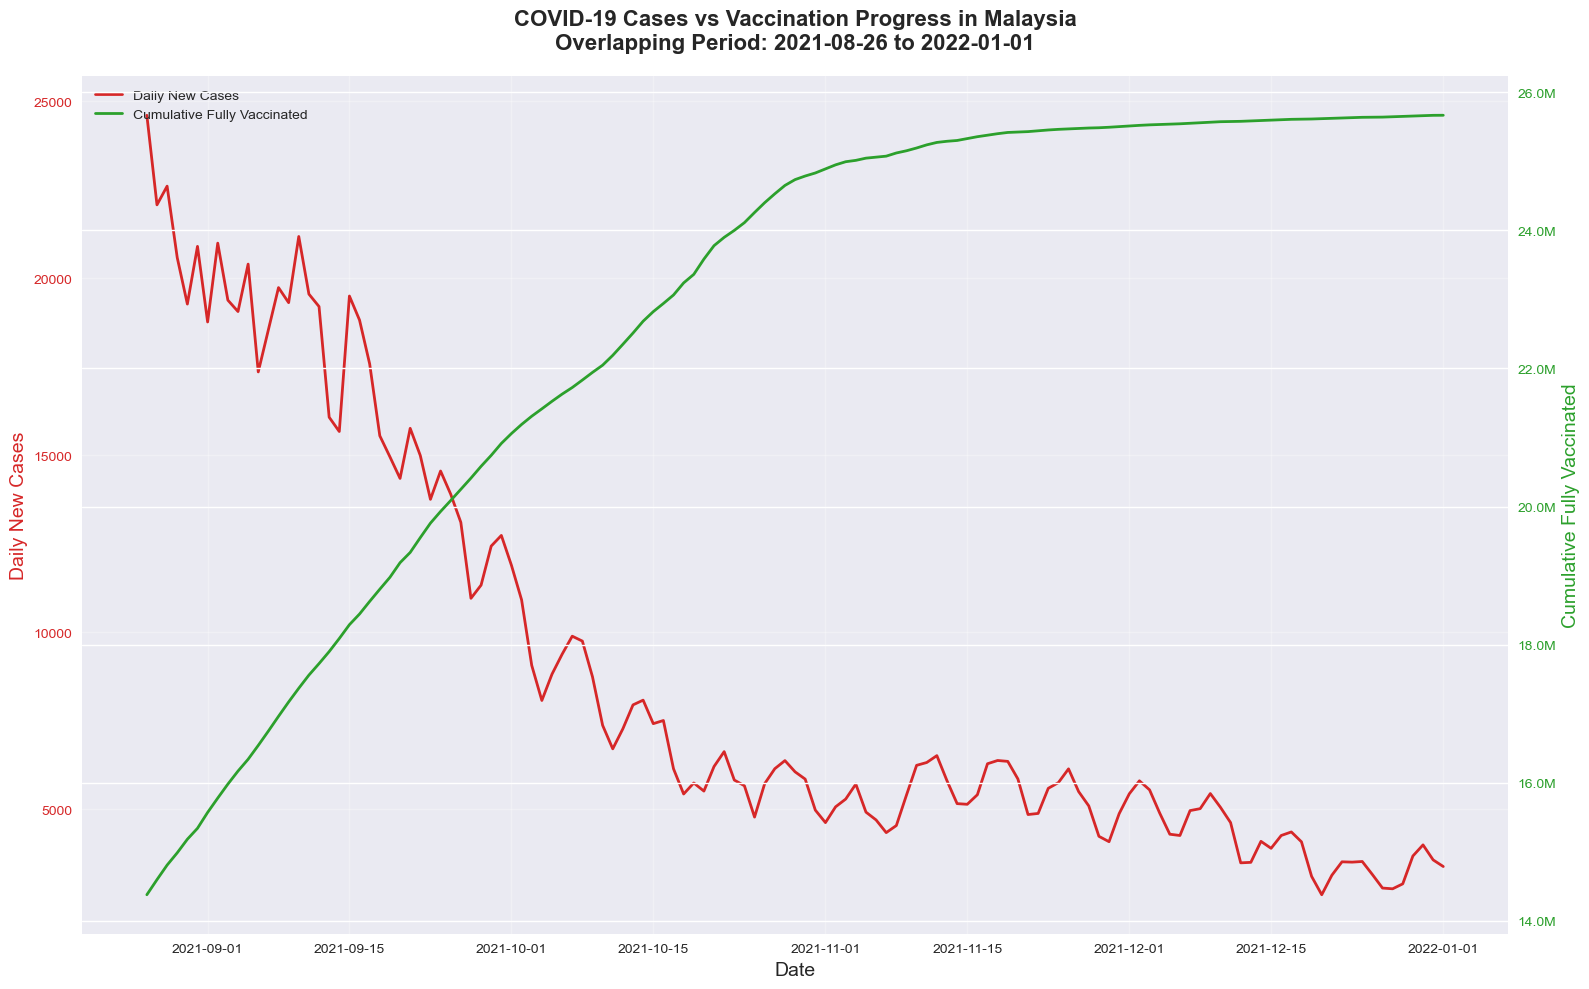

Overlapping analysis period: 2021-08-26 to 2022-01-01
Duration: 128 days


In [7]:
# Plot 3: Combined Analysis - Cases vs Vaccination Timeline
fig, ax1 = plt.subplots(figsize=(16, 10))

# Find overlapping dates for comparison
overlap_start = max(cases_filtered['date'].min(), vax_filtered['date'].min())
overlap_end = min(cases_filtered['date'].max(), vax_filtered['date'].max())

# Filter data for overlapping period
cases_overlap = cases_filtered[
    (cases_filtered['date'] >= overlap_start) & 
    (cases_filtered['date'] <= overlap_end)
]
vax_overlap = vax_filtered[
    (vax_filtered['date'] >= overlap_start) & 
    (vax_filtered['date'] <= overlap_end)
]

# Plot cases on primary y-axis
color1 = 'tab:red'
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Daily New Cases', color=color1, fontsize=14)
line1 = ax1.plot(cases_overlap['date'], cases_overlap['cases_new'], 
                 color=color1, linewidth=2, label='Daily New Cases')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Create secondary y-axis for vaccination
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Cumulative Fully Vaccinated', color=color2, fontsize=14)
line2 = ax2.plot(vax_overlap['date'], vax_overlap['cumul_full'], 
                 color=color2, linewidth=2, label='Cumulative Fully Vaccinated')
ax2.tick_params(axis='y', labelcolor=color2)

# Format vaccination axis to show millions
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Add title and legend
plt.title('COVID-19 Cases vs Vaccination Progress in Malaysia\n' + 
          f'Overlapping Period: {overlap_start.strftime("%Y-%m-%d")} to {overlap_end.strftime("%Y-%m-%d")}', 
          fontsize=16, fontweight='bold', pad=20)

# Create combined legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Overlapping analysis period: {overlap_start.strftime('%Y-%m-%d')} to {overlap_end.strftime('%Y-%m-%d')}")
print(f"Duration: {(overlap_end - overlap_start).days} days")

In [8]:
# Data Preparation for AI Model Prediction
# Target: Predict new cases on 2021-08-26 using vaccination data from around 2021-07-01 (about 2 months earlier)

# Define target prediction dates
prediction_date = '2021-08-26'  # Date to predict cases for
reference_vax_date = '2021-07-01'  # Reference vaccination date (about 2 months earlier)

# Get actual cases for the prediction date
actual_cases_on_target = cases_filtered[cases_filtered['date'] == prediction_date]
if not actual_cases_on_target.empty:
    actual_cases_value = actual_cases_on_target['cases_new'].iloc[0]
    print(f"Actual cases on {prediction_date}: {actual_cases_value:,}")
else:
    print(f"No data available for {prediction_date}")

# Get vaccination status around the reference date
reference_vax_data = vax_filtered[vax_filtered['date'] == reference_vax_date]
if not reference_vax_data.empty:
    reference_vax_value = reference_vax_data['cumul_full'].iloc[0]
    print(f"Cumulative fully vaccinated on {reference_vax_date}: {reference_vax_value/1e6:.2f}M")
else:
    print(f"No vaccination data available for {reference_vax_date}")

# Create a dataset combining vaccination data (features) with future case data (targets)
print("\n" + "="*60)
print("PREPARING TRAINING DATASET FOR AI MODEL")
print("="*60)

# For AI model training, we'll create features from vaccination data and targets from cases data
# We'll use vaccination data as features to predict cases ~2 months later

training_data = []

# Get vaccination data with a lead time
for i, vax_row in vax_filtered.iterrows():
    vax_date = vax_row['date']
    # Look for case data approximately 2 months (56 days) later
    target_date = vax_date + pd.Timedelta(days=56)
    
    # Find corresponding case data
    case_match = cases_filtered[cases_filtered['date'] == target_date]
    if not case_match.empty:
        training_data.append({
            'vax_date': vax_date,
            'cumul_full_vax': vax_row['cumul_full'],
            'target_date': target_date,
            'target_cases': case_match['cases_new'].iloc[0]
        })

# Convert to DataFrame
training_df = pd.DataFrame(training_data)

print(f"Training dataset created with {len(training_df)} samples")
if len(training_df) > 0:
    print(f"Date range: {training_df['vax_date'].min().date()} to {training_df['vax_date'].max().date()}")
    print(f"Target date range: {training_df['target_date'].min().date()} to {training_df['target_date'].max().date()}")
    print("\nFirst few samples:")
    print(training_df.head())

Actual cases on 2021-08-26: 24,599
Cumulative fully vaccinated on 2021-07-01: 2.43M

PREPARING TRAINING DATASET FOR AI MODEL
Training dataset created with 185 samples
Date range: 2021-07-01 to 2022-01-01
Target date range: 2021-08-26 to 2022-02-26

First few samples:
    vax_date  cumul_full_vax target_date  target_cases
0 2021-07-01         2429925  2021-08-26         24599
1 2021-07-02         2500693  2021-08-27         22070
2 2021-07-03         2580136  2021-08-28         22597
3 2021-07-04         2661027  2021-08-29         20579
4 2021-07-05         2782600  2021-08-30         19268


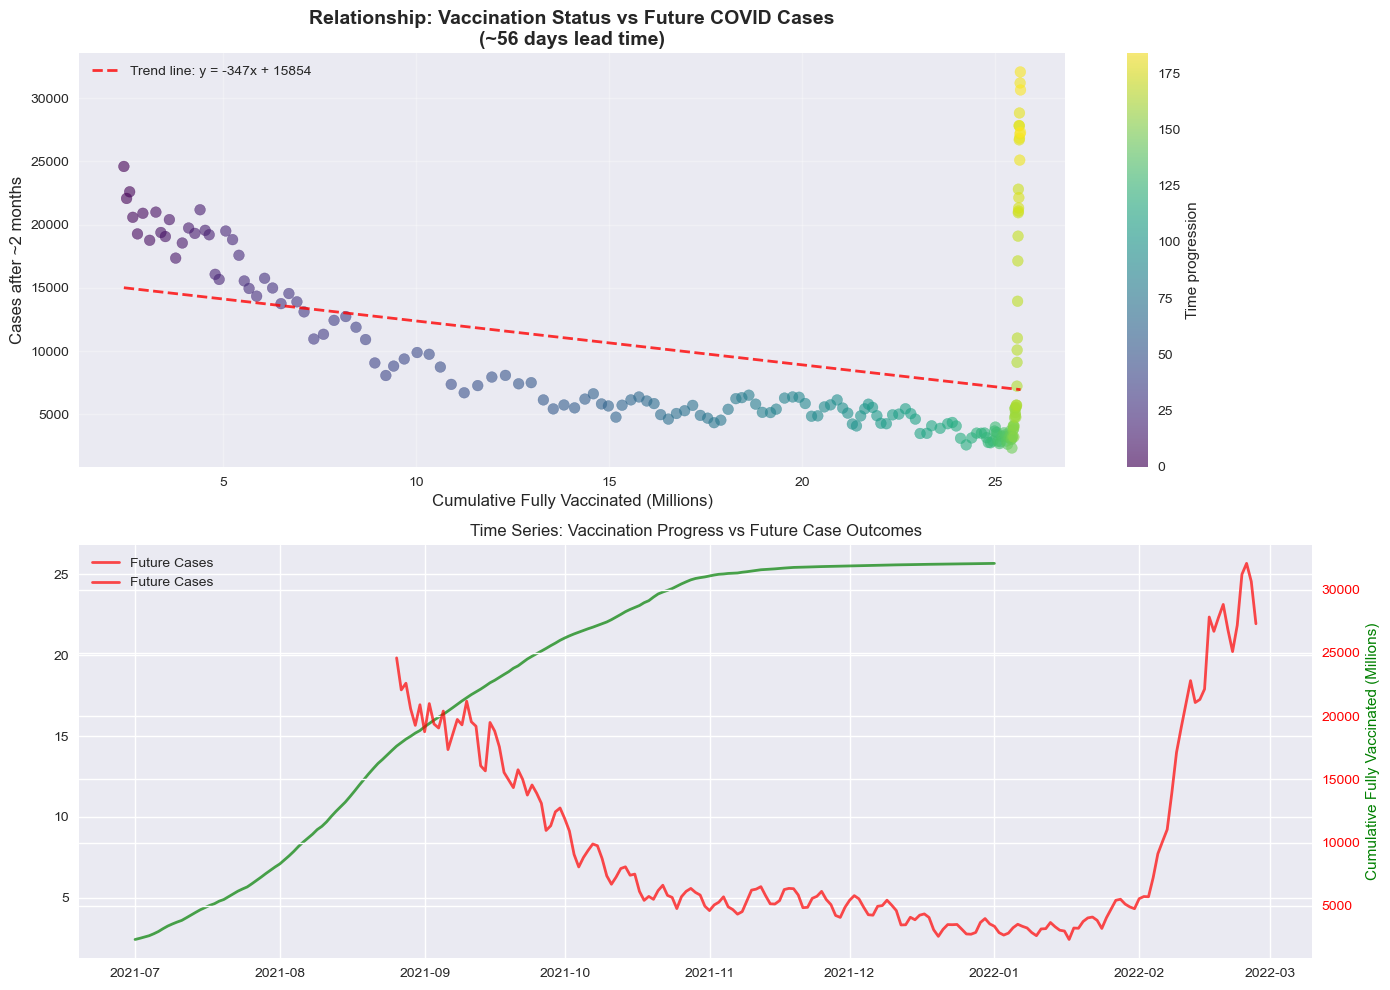

Correlation between vaccination rate and future cases: -0.367
📉 Strong negative correlation: Higher vaccination rates associated with lower future cases


In [9]:
# Plot 4: Relationship between Vaccination Rate and Future Cases
if len(training_df) > 0:
    plt.figure(figsize=(14, 10))
    
    # Scatter plot
    plt.subplot(2, 1, 1)
    plt.scatter(training_df['cumul_full_vax']/1e6, training_df['target_cases'], 
                alpha=0.6, s=60, c=range(len(training_df)), cmap='viridis')
    plt.colorbar(label='Time progression')
    plt.xlabel('Cumulative Fully Vaccinated (Millions)', fontsize=12)
    plt.ylabel('Cases after ~2 months', fontsize=12)
    plt.title('Relationship: Vaccination Status vs Future COVID Cases\n(~56 days lead time)', 
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(training_df['cumul_full_vax']/1e6, training_df['target_cases'], 1)
    p = np.poly1d(z)
    plt.plot(training_df['cumul_full_vax']/1e6, p(training_df['cumul_full_vax']/1e6), 
             "r--", alpha=0.8, linewidth=2, label=f'Trend line: y = {z[0]:.0f}x + {z[1]:.0f}')
    plt.legend()
    
    # Time series view
    plt.subplot(2, 1, 2)
    plt.plot(training_df['vax_date'], training_df['cumul_full_vax']/1e6, 
             'g-', linewidth=2, label='Vaccination Rate (Millions)', alpha=0.7)
    
    # Secondary axis for cases
    ax2 = plt.gca().twinx()
    ax2.plot(training_df['target_date'], training_df['target_cases'], 
             'r-', linewidth=2, label='Future Cases', alpha=0.7)
    ax2.set_ylabel('Cases (56 days later)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.xlabel('Date')
    plt.ylabel('Cumulative Fully Vaccinated (Millions)', color='green')
    plt.title('Time Series: Vaccination Progress vs Future Case Outcomes')
    plt.xticks(rotation=45)
    
    # Create combined legend
    lines1, labels1 = plt.gca().get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    correlation = np.corrcoef(training_df['cumul_full_vax'], training_df['target_cases'])[0,1]
    print(f"Correlation between vaccination rate and future cases: {correlation:.3f}")
    
    if correlation < -0.3:
        print("📉 Strong negative correlation: Higher vaccination rates associated with lower future cases")
    elif correlation > 0.3:
        print("📈 Strong positive correlation: Higher vaccination rates associated with higher future cases")
    else:
        print("➡️ Weak correlation: Limited relationship between vaccination rate and future cases")
else:
    print("No overlapping data available for analysis")

In [10]:
# Summary Statistics and Data Export
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)

print("\n📊 CASES DATA SUMMARY (Aug 26, 2021 - Feb 26, 2022):")
print(f"   • Total days: {len(cases_filtered)}")
print(f"   • Peak cases: {cases_filtered['cases_new'].max():,}")
print(f"   • Minimum cases: {cases_filtered['cases_new'].min():,}")
print(f"   • Average cases: {cases_filtered['cases_new'].mean():.0f}")
print(f"   • Median cases: {cases_filtered['cases_new'].median():.0f}")
print(f"   • Standard deviation: {cases_filtered['cases_new'].std():.0f}")

print("\n💉 VACCINATION DATA SUMMARY (Jul 1, 2021 - Jan 1, 2022):")
print(f"   • Total days: {len(vax_filtered)}")
print(f"   • Starting vaccinations: {vax_filtered['cumul_full'].iloc[0]/1e6:.2f}M")
print(f"   • Ending vaccinations: {vax_filtered['cumul_full'].iloc[-1]/1e6:.2f}M")
print(f"   • Total increase: {(vax_filtered['cumul_full'].iloc[-1] - vax_filtered['cumul_full'].iloc[0])/1e6:.2f}M")
print(f"   • Average daily increase: {vax_filtered['cumul_full'].diff().mean()/1000:.1f}K per day")

if len(training_df) > 0:
    print(f"\n🤖 AI TRAINING DATA SUMMARY:")
    print(f"   • Training samples: {len(training_df)}")
    print(f"   • Vaccination range: {training_df['cumul_full_vax'].min()/1e6:.1f}M - {training_df['cumul_full_vax'].max()/1e6:.1f}M")
    print(f"   • Target cases range: {training_df['target_cases'].min():,} - {training_df['target_cases'].max():,}")
    print(f"   • Prediction lead time: ~56 days (2 months)")

# Export filtered data to CSV for AI model use
cases_filtered.to_csv('filtered_cases_data.csv', index=False)
vax_filtered.to_csv('filtered_vaccination_data.csv', index=False)

if len(training_df) > 0:
    training_df.to_csv('ai_training_data.csv', index=False)
    print(f"\n💾 Data exported:")
    print(f"   • filtered_cases_data.csv - {len(cases_filtered)} records")
    print(f"   • filtered_vaccination_data.csv - {len(vax_filtered)} records") 
    print(f"   • ai_training_data.csv - {len(training_df)} training samples")
else:
    print(f"\n💾 Data exported:")
    print(f"   • filtered_cases_data.csv - {len(cases_filtered)} records")
    print(f"   • filtered_vaccination_data.csv - {len(vax_filtered)} records")

print("\n✅ Analysis complete! The filtered data is ready for AI model training.")

SUMMARY STATISTICS

📊 CASES DATA SUMMARY (Aug 26, 2021 - Feb 26, 2022):
   • Total days: 185
   • Peak cases: 32,070
   • Minimum cases: 2,342
   • Average cases: 9616
   • Median cases: 5806
   • Standard deviation: 7522

💉 VACCINATION DATA SUMMARY (Jul 1, 2021 - Jan 1, 2022):
   • Total days: 185
   • Starting vaccinations: 2.43M
   • Ending vaccinations: 25.67M
   • Total increase: 23.24M
   • Average daily increase: 126.3K per day

🤖 AI TRAINING DATA SUMMARY:
   • Training samples: 185
   • Vaccination range: 2.4M - 25.7M
   • Target cases range: 2,342 - 32,070
   • Prediction lead time: ~56 days (2 months)

💾 Data exported:
   • filtered_cases_data.csv - 185 records
   • filtered_vaccination_data.csv - 185 records
   • ai_training_data.csv - 185 training samples

✅ Analysis complete! The filtered data is ready for AI model training.


Run


In [11]:
# Machine Learning Libraries for Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import joblib

print("Machine learning libraries imported successfully!")

Machine learning libraries imported successfully!


In [12]:
# Prepare Training Data for Regression
print("="*60)
print("PREPARING DATA FOR REGRESSION MODELING")
print("="*60)

if len(training_df) > 0:
    # Features: Cumulative fully vaccinated (input)
    X = training_df[['cumul_full_vax']].values
    
    # Target: New cases after 2 months (output)
    y = training_df['target_cases'].values
    
    # Split data into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )
    
    print(f"📊 Dataset Information:")
    print(f"   • Total samples: {len(training_df)}")
    print(f"   • Training samples: {len(X_train)}")
    print(f"   • Testing samples: {len(X_test)}")
    print(f"   • Feature: Cumulative Fully Vaccinated")
    print(f"   • Target: New Cases (after ~56 days)")
    
    # Display data ranges
    print(f"\n📈 Data Ranges:")
    print(f"   • Vaccination range: {X.min()/1e6:.2f}M - {X.max()/1e6:.2f}M")
    print(f"   • Cases range: {y.min():,} - {y.max():,}")
    print(f"   • Average cases: {y.mean():.0f}")
    
    # Create a scaler for feature normalization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\n✅ Data prepared and scaled for training!")
    
else:
    print("❌ No training data available. Please run previous cells first.")
    X_train = X_test = y_train = y_test = None

PREPARING DATA FOR REGRESSION MODELING
📊 Dataset Information:
   • Total samples: 185
   • Training samples: 148
   • Testing samples: 37
   • Feature: Cumulative Fully Vaccinated
   • Target: New Cases (after ~56 days)

📈 Data Ranges:
   • Vaccination range: 2.43M - 25.67M
   • Cases range: 2,342 - 32,070
   • Average cases: 9616

✅ Data prepared and scaled for training!


In [13]:
# Train Multiple Regression Models
if X_train is not None:
    print("="*60)
    print("TRAINING REGRESSION MODELS")
    print("="*60)
    
    # Define models to compare
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    
    # Dictionary to store trained models and their scores
    model_results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n🔧 Training {name}...")
        
        # Use scaled data for linear models, original data for tree-based models
        if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
            X_train_model = X_train_scaled
            X_test_model = X_test_scaled
        else:
            X_train_model = X_train
            X_test_model = X_test
        
        # Train the model
        model.fit(X_train_model, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train_model)
        y_pred_test = model.predict(X_test_model)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        # Store results
        model_results[name] = {
            'model': model,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'scaled_data': name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
        }
        
        print(f"   ✅ R² Score: {test_r2:.3f}")
        print(f"   📊 MAE: {test_mae:.0f} cases")
        print(f"   📈 RMSE: {test_rmse:.0f} cases")
    
    print(f"\n🏆 Model training completed!")
    
else:
    print("❌ Cannot train models - no training data available.")

TRAINING REGRESSION MODELS

🔧 Training Linear Regression...
   ✅ R² Score: 0.133
   📊 MAE: 4736 cases
   📈 RMSE: 6524 cases

🔧 Training Ridge Regression...
   ✅ R² Score: 0.134
   📊 MAE: 4742 cases
   📈 RMSE: 6523 cases

🔧 Training Lasso Regression...
   ✅ R² Score: 0.133
   📊 MAE: 4737 cases
   📈 RMSE: 6524 cases

🔧 Training Random Forest...
   ✅ R² Score: 0.978
   📊 MAE: 683 cases
   📈 RMSE: 1034 cases

🔧 Training Gradient Boosting...
   ✅ R² Score: 0.974
   📊 MAE: 831 cases
   📈 RMSE: 1138 cases

🏆 Model training completed!


MODEL PERFORMANCE COMPARISON
📊 Model Performance Summary:
            Model  Test R²  Test MAE  Test RMSE  Train R²  Overfitting
    Random Forest    0.978   682.525   1033.530     0.997        0.019
Gradient Boosting    0.974   831.386   1138.144     0.998        0.024
 Ridge Regression    0.134  4742.459   6522.808     0.135        0.001
 Lasso Regression    0.133  4736.684   6523.525     0.135        0.002
Linear Regression    0.133  4736.359   6523.567     0.135        0.002

🏆 BEST MODEL: Random Forest
   • Test R² Score: 0.978
   • Test MAE: 683 cases
   • Test RMSE: 1034 cases
   • Uses scaled data: False


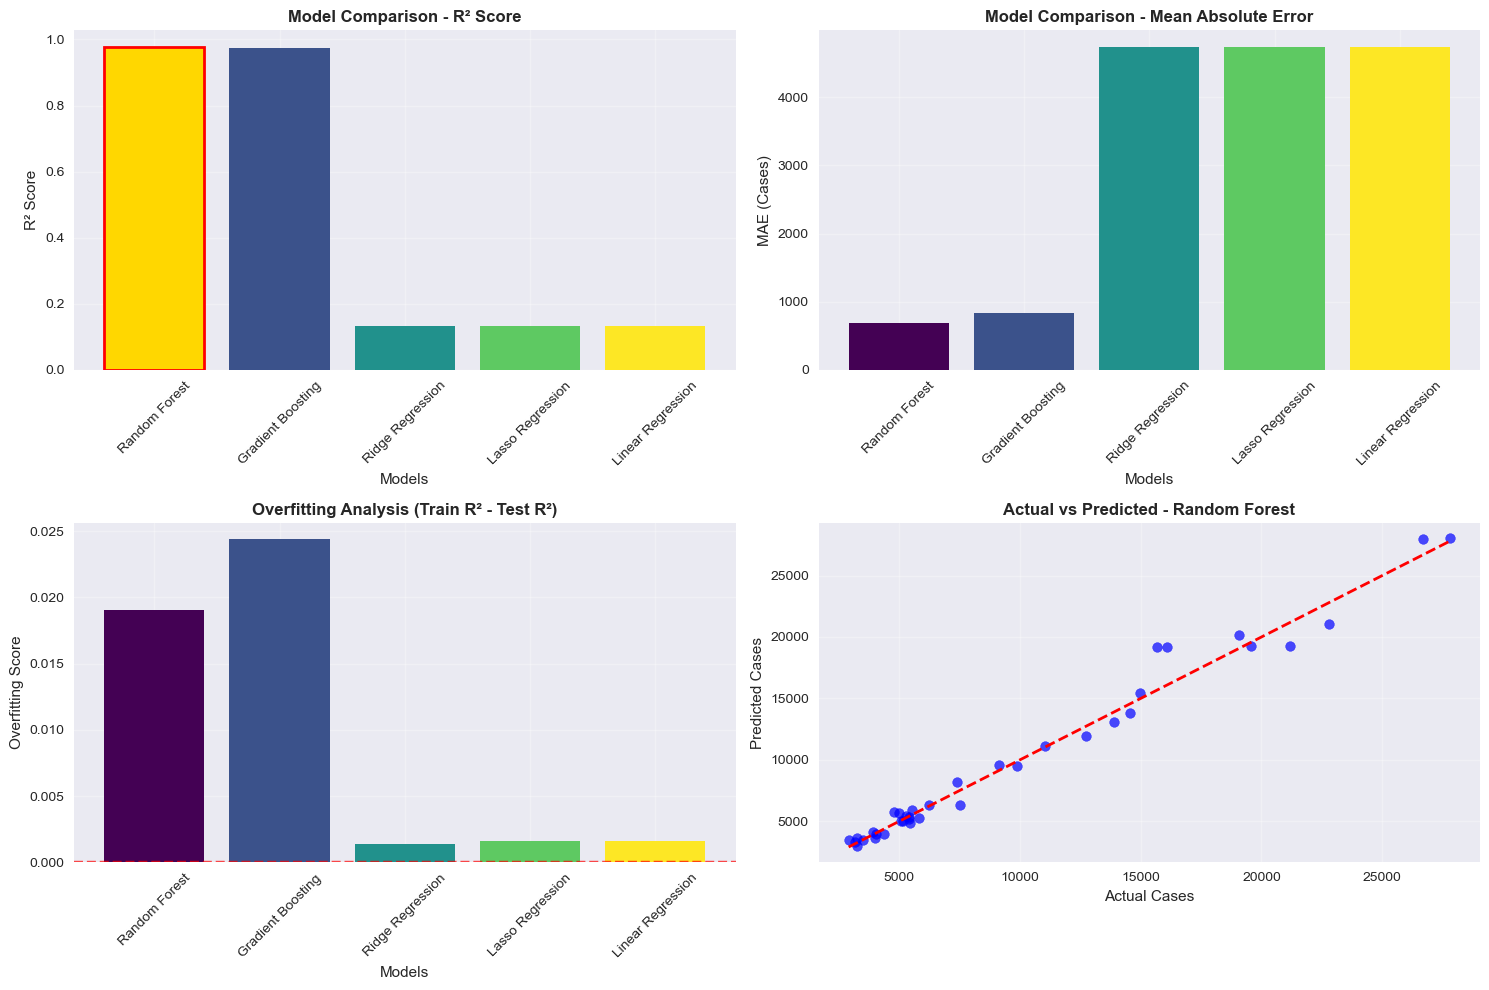

In [14]:
# Model Performance Comparison and Selection
if 'model_results' in locals() and model_results:
    print("="*60)
    print("MODEL PERFORMANCE COMPARISON")
    print("="*60)
    
    # Declare global variables
    global best_model, best_model_info, best_model_name
    
    # Create comparison DataFrame
    comparison_data = []
    for name, results in model_results.items():
        comparison_data.append({
            'Model': name,
            'Test R²': results['test_r2'],
            'Test MAE': results['test_mae'],
            'Test RMSE': results['test_rmse'],
            'Train R²': results['train_r2'],
            'Overfitting': results['train_r2'] - results['test_r2']
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Test R²', ascending=False)
    
    print("📊 Model Performance Summary:")
    print(comparison_df.to_string(index=False, float_format='%.3f'))
    
    # Select best model based on Test R² score
    best_model_name = comparison_df.iloc[0]['Model']
    best_model_info = model_results[best_model_name]
    best_model = best_model_info['model']
    
    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   • Test R² Score: {best_model_info['test_r2']:.3f}")
    print(f"   • Test MAE: {best_model_info['test_mae']:.0f} cases")
    print(f"   • Test RMSE: {best_model_info['test_rmse']:.0f} cases")
    print(f"   • Uses scaled data: {best_model_info['scaled_data']}")
    
    # Visualize model performance
    plt.figure(figsize=(15, 10))
    
    # R² Score comparison
    plt.subplot(2, 2, 1)
    models_names = comparison_df['Model']
    test_r2_scores = comparison_df['Test R²']
    colors = plt.cm.viridis(np.linspace(0, 1, len(models_names)))
    bars = plt.bar(range(len(models_names)), test_r2_scores, color=colors)
    plt.title('Model Comparison - R² Score', fontweight='bold')
    plt.xlabel('Models')
    plt.ylabel('R² Score')
    plt.xticks(range(len(models_names)), models_names, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Highlight best model
    best_idx = 0  # Already sorted by R² score
    bars[best_idx].set_color('gold')
    bars[best_idx].set_edgecolor('red')
    bars[best_idx].set_linewidth(2)
    
    # MAE comparison
    plt.subplot(2, 2, 2)
    test_mae_scores = comparison_df['Test MAE']
    plt.bar(range(len(models_names)), test_mae_scores, color=colors)
    plt.title('Model Comparison - Mean Absolute Error', fontweight='bold')
    plt.xlabel('Models')
    plt.ylabel('MAE (Cases)')
    plt.xticks(range(len(models_names)), models_names, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Overfitting analysis
    plt.subplot(2, 2, 3)
    overfitting = comparison_df['Overfitting']
    bars_over = plt.bar(range(len(models_names)), overfitting, color=colors)
    plt.title('Overfitting Analysis (Train R² - Test R²)', fontweight='bold')
    plt.xlabel('Models')
    plt.ylabel('Overfitting Score')
    plt.xticks(range(len(models_names)), models_names, rotation=45)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    
    # Actual vs Predicted scatter plot for best model
    plt.subplot(2, 2, 4)
    if best_model_info['scaled_data']:
        X_test_best = X_test_scaled
    else:
        X_test_best = X_test
    
    y_pred_best = best_model.predict(X_test_best)
    plt.scatter(y_test, y_pred_best, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted - {best_model_name}', fontweight='bold')
    plt.xlabel('Actual Cases')
    plt.ylabel('Predicted Cases')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ No model results available for comparison.")

In [18]:
# Interactive Prediction Function
def predict_cases_from_vaccination(vaccination_count_millions, show_details=True):
    """
    Predict new cases after 2 months based on current vaccination count
    
    Parameters:
    vaccination_count_millions (float): Number of fully vaccinated people in millions
    show_details (bool): Whether to show detailed comparison with actual data
    
    Returns:
    dict: Prediction results and accuracy metrics
    """
    # Access global variables
    global best_model, best_model_info, best_model_name, scaler, training_df
    
    try:
        # Check if required variables exist
        if 'best_model' not in globals() or 'best_model_info' not in globals():
            return {"error": "Model not trained yet. Please run training cells first."}
    except:
        return {"error": "Model not trained yet. Please run training cells first."}
    
    # Access global variables
    global best_model, best_model_info, best_model_name, scaler, training_df
    
    try:
        # Check if required variables exist
        if 'best_model' not in globals() or 'best_model_info' not in globals():
            return {"error": "Model not trained yet. Please run training cells first."}
    except:
        return {"error": "Model not trained yet. Please run training cells first."}
    
    # Convert millions to actual count
    vaccination_count = vaccination_count_millions * 1e6
    
    # Prepare input data
    X_input = np.array([[vaccination_count]])
    
    # Apply scaling if model requires it
    if best_model_info['scaled_data']:
        X_input_scaled = scaler.transform(X_input)
        prediction = best_model.predict(X_input_scaled)[0]
    else:
        prediction = best_model.predict(X_input)[0]
    
    # Find closest actual data point for comparison
    vaccination_diffs = np.abs(training_df['cumul_full_vax'].values - vaccination_count)
    closest_idx = np.argmin(vaccination_diffs)
    closest_actual_vax = training_df.iloc[closest_idx]['cumul_full_vax']
    closest_actual_cases = training_df.iloc[closest_idx]['target_cases']
    closest_vax_date = training_df.iloc[closest_idx]['vax_date']
    closest_target_date = training_df.iloc[closest_idx]['target_date']
    
    # Calculate accuracy metrics
    prediction_error = abs(prediction - closest_actual_cases)
    percentage_error = (prediction_error / closest_actual_cases) * 100 if closest_actual_cases > 0 else 0
    
    if show_details:
        print("="*80)
        print(f"🤖 COVID-19 CASES PREDICTION (2 months ahead)")
        print("="*80)
        print(f"📥 INPUT:")
        print(f"   • Fully Vaccinated: {vaccination_count_millions:.2f} million people")
        print(f"   • Model Used: {best_model_name}")
        print(f"   • Model Accuracy: R² = {best_model_info['test_r2']:.3f}")
        
        print(f"\n🎯 PREDICTION:")
        print(f"   • Predicted New Cases (after ~2 months): {prediction:,.0f}")
        
        print(f"\n📊 COMPARISON WITH ACTUAL DATA:")
        print(f"   • Closest historical vaccination level: {closest_actual_vax/1e6:.2f}M")
        print(f"   • Vaccination date: {closest_vax_date.strftime('%Y-%m-%d')}")
        print(f"   • Target date (2 months later): {closest_target_date.strftime('%Y-%m-%d')}")
        print(f"   • Actual cases on target date: {closest_actual_cases:,.0f}")
        
        print(f"\n📈 ACCURACY ASSESSMENT:")
        print(f"   • Prediction Error: {prediction_error:,.0f} cases")
        print(f"   • Percentage Error: {percentage_error:.1f}%")
        
        if percentage_error < 10:
            accuracy_level = "🎯 Excellent"
        elif percentage_error < 25:
            accuracy_level = "✅ Good"
        elif percentage_error < 50:
            accuracy_level = "⚠️ Moderate"
        else:
            accuracy_level = "❌ Poor"
            
        print(f"   • Accuracy Level: {accuracy_level}")
        
        # Visualization
        plt.figure(figsize=(12, 8))
        
        # Scatter plot of all data points
        plt.subplot(2, 1, 1)
        plt.scatter(training_df['cumul_full_vax']/1e6, training_df['target_cases'], 
                   alpha=0.6, s=50, c='lightblue', label='Historical Data')
        
        # Highlight the input point and prediction
        plt.scatter([vaccination_count_millions], [prediction], 
                   color='red', s=200, marker='*', label='Prediction', zorder=5)
        
        # Highlight closest actual point
        plt.scatter([closest_actual_vax/1e6], [closest_actual_cases], 
                   color='orange', s=150, marker='o', label='Closest Actual', zorder=5)
        
        # Draw connection line
        plt.plot([vaccination_count_millions, closest_actual_vax/1e6], 
                [prediction, closest_actual_cases], 
                'k--', alpha=0.5, label='Comparison')
        
        plt.xlabel('Cumulative Fully Vaccinated (Millions)')
        plt.ylabel('New Cases (after 2 months)')
        plt.title(f'Prediction Visualization - Input: {vaccination_count_millions:.2f}M Vaccinated')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Bar chart comparison
        plt.subplot(2, 1, 2)
        categories = ['Predicted Cases', 'Actual Cases']
        values = [prediction, closest_actual_cases]
        colors = ['red', 'orange']
        
        bars = plt.bar(categories, values, color=colors, alpha=0.7)
        plt.title('Predicted vs Actual Cases Comparison')
        plt.ylabel('Number of Cases')
        
        # Add value labels on bars
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01, 
                    f'{value:,.0f}', ha='center', va='bottom', fontweight='bold')
        
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
    
    return {
        'predicted_cases': prediction,
        'actual_cases': closest_actual_cases,
        'prediction_error': prediction_error,
        'percentage_error': percentage_error,
        'model_used': best_model_name,
        'model_r2': best_model_info['test_r2'],
        'closest_vax_date': closest_vax_date.strftime('%Y-%m-%d'),
        'target_date': closest_target_date.strftime('%Y-%m-%d')
    }

print("✅ Interactive prediction function created!")
print("📝 Usage: predict_cases_from_vaccination(vaccination_millions)")
print("   Example: predict_cases_from_vaccination(15.5)  # For 15.5M vaccinated")

✅ Interactive prediction function created!
📝 Usage: predict_cases_from_vaccination(vaccination_millions)
   Example: predict_cases_from_vaccination(15.5)  # For 15.5M vaccinated


In [19]:
# Example Predictions - Testing Different Vaccination Levels
print("="*80)
print("🧪 TESTING PREDICTIONS WITH DIFFERENT VACCINATION LEVELS")
print("="*80)

if 'best_model' in globals() and len(training_df) > 0:
    # Get some example vaccination levels from our dataset
    vax_min = training_df['cumul_full_vax'].min() / 1e6
    vax_max = training_df['cumul_full_vax'].max() / 1e6
    vax_median = training_df['cumul_full_vax'].median() / 1e6
    
    test_levels = [
        vax_min,
        vax_median,
        vax_max,
        12.0,  # Custom example
        18.0   # Custom example
    ]
    
    print(f"Available vaccination range in data: {vax_min:.1f}M - {vax_max:.1f}M")
    print(f"Testing with {len(test_levels)} different levels...\n")
    
    # Store results for summary
    test_results = []
    
    for i, vax_level in enumerate(test_levels):
        print(f"📊 Test {i+1}: {vax_level:.1f}M Vaccinated")
        print("-" * 50)
        
        if vax_min <= vax_level <= vax_max:
            result = predict_cases_from_vaccination(vax_level, show_details=False)
            test_results.append({
                'Vaccination (M)': vax_level,
                'Predicted Cases': result['predicted_cases'],
                'Actual Cases': result['actual_cases'],
                'Error': result['prediction_error'],
                'Error %': result['percentage_error']
            })
            
            print(f"   🎯 Predicted: {result['predicted_cases']:,.0f} cases")
            print(f"   📊 Actual: {result['actual_cases']:,.0f} cases")
            print(f"   📈 Error: {result['prediction_error']:,.0f} cases ({result['percentage_error']:.1f}%)")
        else:
            print(f"   ⚠️ Outside training data range ({vax_min:.1f}M - {vax_max:.1f}M)")
            # Still make prediction but note it's extrapolation
            result = predict_cases_from_vaccination(vax_level, show_details=False)
            print(f"   🎯 Predicted (extrapolated): {result['predicted_cases']:,.0f} cases")
        
        print()
    
    # Summary table
    if test_results:
        print("📋 PREDICTION SUMMARY TABLE")
        print("=" * 80)
        summary_df = pd.DataFrame(test_results)
        print(summary_df.to_string(index=False, float_format='%.1f'))
        
        avg_error = summary_df['Error %'].mean()
        print(f"\n📊 Average Prediction Error: {avg_error:.1f}%")
        
        if avg_error < 15:
            print("✅ Model shows good predictive accuracy!")
        elif avg_error < 30:
            print("⚠️ Model shows moderate predictive accuracy.")
        else:
            print("❌ Model may need improvement for better accuracy.")

else:
    print("❌ Cannot run examples - model not trained or no training data available.")

🧪 TESTING PREDICTIONS WITH DIFFERENT VACCINATION LEVELS
Available vaccination range in data: 2.4M - 25.7M
Testing with 5 different levels...

📊 Test 1: 2.4M Vaccinated
--------------------------------------------------
   🎯 Predicted: 23,608 cases
   📊 Actual: 24,599 cases
   📈 Error: 991 cases (4.0%)

📊 Test 2: 21.1M Vaccinated
--------------------------------------------------
   🎯 Predicted: 5,426 cases
   📊 Actual: 5,501 cases
   📈 Error: 75 cases (1.4%)

📊 Test 3: 25.7M Vaccinated
--------------------------------------------------
   🎯 Predicted: 28,654 cases
   📊 Actual: 27,299 cases
   📈 Error: 1,355 cases (5.0%)

📊 Test 4: 12.0M Vaccinated
--------------------------------------------------
   🎯 Predicted: 7,886 cases
   📊 Actual: 7,950 cases
   📈 Error: 64 cases (0.8%)

📊 Test 5: 18.0M Vaccinated
--------------------------------------------------
   🎯 Predicted: 4,636 cases
   📊 Actual: 5,403 cases
   📈 Error: 767 cases (14.2%)

📋 PREDICTION SUMMARY TABLE
 Vaccination (M)  Pred

🎮 INTERACTIVE COVID-19 CASES PREDICTOR
Instructions: Change the 'vaccination_input' value below and run this cell
The model will predict COVID-19 cases 2 months after the given vaccination level

🔍 Testing with 15.0 million fully vaccinated people...

🤖 COVID-19 CASES PREDICTION (2 months ahead)
📥 INPUT:
   • Fully Vaccinated: 15.00 million people
   • Model Used: Random Forest
   • Model Accuracy: R² = 0.978

🎯 PREDICTION:
   • Predicted New Cases (after ~2 months): 5,728

📊 COMPARISON WITH ACTUAL DATA:
   • Closest historical vaccination level: 14.99M
   • Vaccination date: 2021-08-29
   • Target date (2 months later): 2021-10-24
   • Actual cases on target date: 5,666

📈 ACCURACY ASSESSMENT:
   • Prediction Error: 62 cases
   • Percentage Error: 1.1%
   • Accuracy Level: 🎯 Excellent


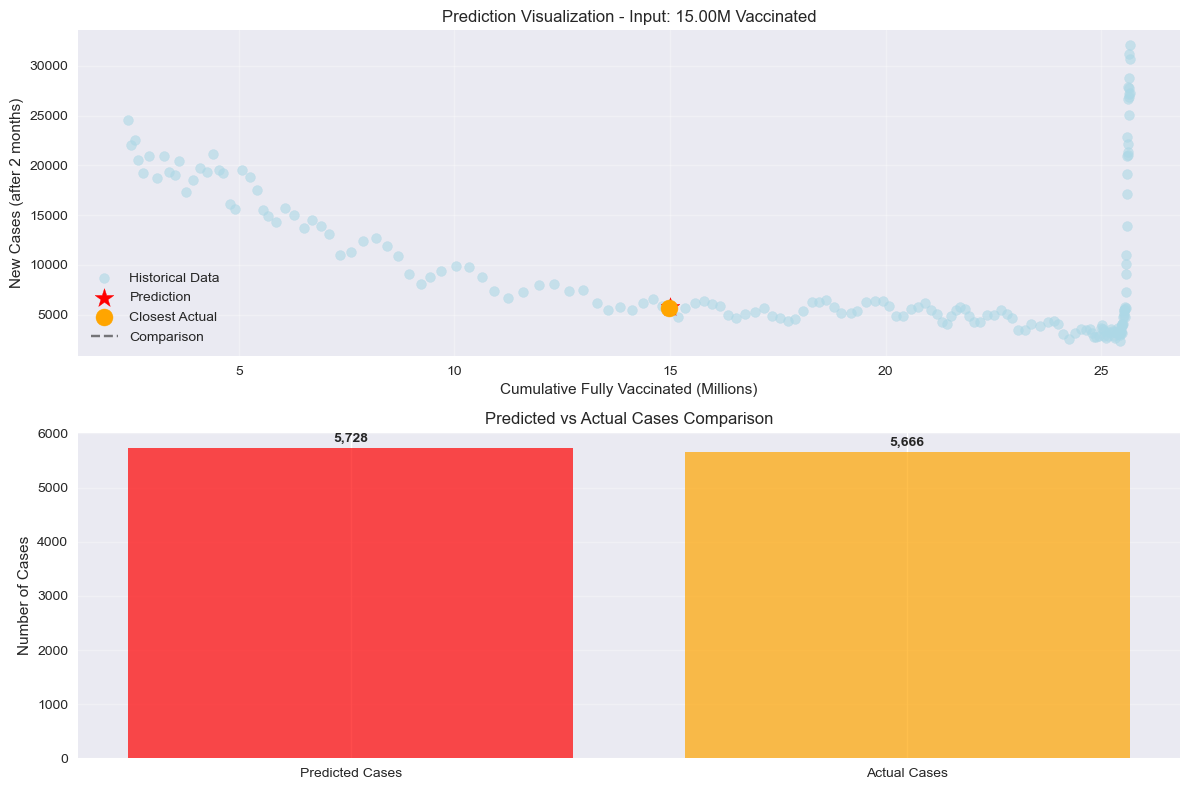


💡 INSIGHTS:
   • This vaccination level is within our historical data range
   • Prediction is based on interpolation (more reliable)
   • Model used: Random Forest
   • Model R² accuracy: 0.978

🔄 QUICK COMPARISONS:
   • At 13.0M vaccinated: ~6,350 cases
   • At 15.0M vaccinated: ~5,728 cases
   • At 17.0M vaccinated: ~5,399 cases

✨ To test another vaccination level, change 'vaccination_input' and run this cell again!

📝 Valid vaccination range for reliable predictions: 2.4M - 25.7M


In [20]:
# 🎮 INTERACTIVE PREDICTION TOOL
# Run this cell and modify the vaccination_input value to test different scenarios

print("="*80)
print("🎮 INTERACTIVE COVID-19 CASES PREDICTOR")
print("="*80)

if 'predict_cases_from_vaccination' in globals():
    print("Instructions: Change the 'vaccination_input' value below and run this cell")
    print("The model will predict COVID-19 cases 2 months after the given vaccination level")
    print()
    
    # 👇 CHANGE THIS VALUE TO TEST DIFFERENT VACCINATION LEVELS 👇
    vaccination_input = 15.0  # Enter vaccination level in millions (e.g., 15.0 for 15 million)
    
    print(f"🔍 Testing with {vaccination_input:.1f} million fully vaccinated people...")
    print()
    
    # Make prediction
    result = predict_cases_from_vaccination(vaccination_input)
    
    if 'error' not in result:
        print(f"\n💡 INSIGHTS:")
        
        # Provide contextual insights
        vax_range_min = training_df['cumul_full_vax'].min() / 1e6
        vax_range_max = training_df['cumul_full_vax'].max() / 1e6
        
        if vaccination_input < vax_range_min:
            print(f"   • This vaccination level is lower than our historical data range")
            print(f"   • Prediction is based on extrapolation (less reliable)")
        elif vaccination_input > vax_range_max:
            print(f"   • This vaccination level is higher than our historical data range")
            print(f"   • Prediction is based on extrapolation (less reliable)")
        else:
            print(f"   • This vaccination level is within our historical data range")
            print(f"   • Prediction is based on interpolation (more reliable)")
        
        print(f"   • Model used: {result['model_used']}")
        print(f"   • Model R² accuracy: {result['model_r2']:.3f}")
        
        # Quick comparison with different levels
        print(f"\n🔄 QUICK COMPARISONS:")
        lower_level = max(vaccination_input - 2, vax_range_min)
        higher_level = min(vaccination_input + 2, vax_range_max)
        
        if lower_level != vaccination_input:
            lower_result = predict_cases_from_vaccination(lower_level, show_details=False)
            print(f"   • At {lower_level:.1f}M vaccinated: ~{lower_result['predicted_cases']:,.0f} cases")
        
        print(f"   • At {vaccination_input:.1f}M vaccinated: ~{result['predicted_cases']:,.0f} cases")
        
        if higher_level != vaccination_input:
            higher_result = predict_cases_from_vaccination(higher_level, show_details=False)
            print(f"   • At {higher_level:.1f}M vaccinated: ~{higher_result['predicted_cases']:,.0f} cases")
    
    print(f"\n" + "="*80)
    print("✨ To test another vaccination level, change 'vaccination_input' and run this cell again!")
    
else:
    print("❌ Prediction function not available. Please run all previous cells first.")
    
print(f"\n📝 Valid vaccination range for reliable predictions: {vax_range_min:.1f}M - {vax_range_max:.1f}M")

In [22]:
# 📊 MODEL EVALUATION: FEBRUARY VACCINATION DATA vs ACTUAL CASES
print("="*80)
print("📊 MODEL EVALUATION: PREDICTING FEBRUARY CASES FROM JULY VACCINATION DATA")
print("="*80)

if 'best_model' in globals() and len(training_df) > 0:
    # Get February vaccination data (around 2022-02-01 to 2022-02-26)
    feb_start = '2022-02-01'
    feb_end = '2022-02-26'
    
    # Filter vaccination data for February
    feb_vax_data = vax_df[
        (vax_df['date'] >= feb_start) & 
        (vax_df['date'] <= feb_end)
    ][['date', 'cumul_full']].copy()
    
    # Get corresponding actual cases data for February
    feb_cases_data = cases_df[
        (cases_df['date'] >= feb_start) & 
        (cases_df['date'] <= feb_end)
    ][['date', 'cases_new']].copy()
    
    print(f"📅 Evaluation Period: {feb_start} to {feb_end}")
    print(f"💉 February vaccination data points: {len(feb_vax_data)}")
    print(f"🦠 February cases data points: {len(feb_cases_data)}")
    
    if len(feb_vax_data) > 0 and len(feb_cases_data) > 0:
        # Create evaluation dataset
        evaluation_results = []
        
        print(f"\n🔍 Making predictions for each day in February...")
        print("-" * 60)
        
        for idx, vax_row in feb_vax_data.iterrows():
            vax_date = vax_row['date']
            vax_count = vax_row['cumul_full']
            
            # Find corresponding actual cases for the same date
            actual_cases_row = feb_cases_data[feb_cases_data['date'] == vax_date]
            
            if not actual_cases_row.empty:
                actual_cases = actual_cases_row['cases_new'].iloc[0]
                
                # Make prediction using the trained model
                vaccination_millions = vax_count / 1e6
                
                # Prepare input for model prediction
                X_input = np.array([[vax_count]])
                
                # Apply scaling if model requires it
                if best_model_info['scaled_data']:
                    X_input_scaled = scaler.transform(X_input)
                    predicted_cases = best_model.predict(X_input_scaled)[0]
                else:
                    predicted_cases = best_model.predict(X_input)[0]
                
                # Calculate error metrics
                prediction_error = abs(predicted_cases - actual_cases)
                percentage_error = (prediction_error / actual_cases * 100) if actual_cases > 0 else 0
                
                evaluation_results.append({
                    'Date': vax_date.strftime('%Y-%m-%d'),
                    'Vaccination (M)': vaccination_millions,
                    'Predicted Cases': predicted_cases,
                    'Actual Cases': actual_cases,
                    'Absolute Error': prediction_error,
                    'Percentage Error (%)': percentage_error
                })
                
                print(f"{vax_date.strftime('%Y-%m-%d')}: {vaccination_millions:.1f}M vax → "
                      f"Predicted: {predicted_cases:,.0f}, Actual: {actual_cases:,.0f}, "
                      f"Error: {percentage_error:.1f}%")
        
        if evaluation_results:
            # Convert to DataFrame for analysis
            eval_df = pd.DataFrame(evaluation_results)
            
            print(f"\n📈 EVALUATION RESULTS SUMMARY:")
            print("=" * 80)
            print(eval_df.to_string(index=False, float_format='%.1f'))
            
            # Calculate overall accuracy metrics
            mean_abs_error = eval_df['Absolute Error'].mean()
            mean_percentage_error = eval_df['Percentage Error (%)'].mean()
            median_percentage_error = eval_df['Percentage Error (%)'].median()
            std_percentage_error = eval_df['Percentage Error (%)'].std()
            
            print(f"\n📊 OVERALL ACCURACY METRICS:")
            print("-" * 40)
            print(f"📍 Mean Absolute Error: {mean_abs_error:,.0f} cases")
            print(f"📍 Mean Percentage Error: {mean_percentage_error:.1f}%")
            print(f"📍 Median Percentage Error: {median_percentage_error:.1f}%")
            print(f"📍 Std Dev Percentage Error: {std_percentage_error:.1f}%")
            print(f"📍 Model R² Score: {best_model_info['test_r2']:.3f}")
            print(f"📍 Best/Worst Error: {eval_df['Percentage Error (%)'].min():.1f}% / {eval_df['Percentage Error (%)'].max():.1f}%")
            
            # Accuracy assessment
            if mean_percentage_error < 15:
                accuracy_assessment = "🎯 Excellent - Model predictions are highly accurate"
            elif mean_percentage_error < 30:
                accuracy_assessment = "✅ Good - Model shows reliable predictive performance"
            elif mean_percentage_error < 50:
                accuracy_assessment = "⚠️ Moderate - Model has reasonable but limited accuracy"
            else:
                accuracy_assessment = "❌ Poor - Model needs significant improvement"
            
            print(f"📍 Overall Assessment: {accuracy_assessment}")
            
        else:
            print("❌ No matching vaccination and cases data found for evaluation period.")
    
    else:
        print("❌ Insufficient February data for evaluation.")
        print(f"   Vaccination data points: {len(feb_vax_data)}")
        print(f"   Cases data points: {len(feb_cases_data)}")

else:
    print("❌ Model not available. Please run all training cells first.")

📊 MODEL EVALUATION: PREDICTING FEBRUARY CASES FROM JULY VACCINATION DATA
📅 Evaluation Period: 2022-02-01 to 2022-02-26
💉 February vaccination data points: 26
🦠 February cases data points: 26

🔍 Making predictions for each day in February...
------------------------------------------------------------
2022-02-01: 25.7M vax → Predicted: 28,654, Actual: 5,566, Error: 414.8%
2022-02-02: 25.7M vax → Predicted: 28,654, Actual: 5,736, Error: 399.6%
2022-02-03: 25.8M vax → Predicted: 28,654, Actual: 5,720, Error: 400.9%
2022-02-04: 25.8M vax → Predicted: 28,654, Actual: 7,234, Error: 296.1%
2022-02-05: 25.8M vax → Predicted: 28,654, Actual: 9,117, Error: 214.3%
2022-02-06: 25.8M vax → Predicted: 28,654, Actual: 10,089, Error: 184.0%
2022-02-07: 25.8M vax → Predicted: 28,654, Actual: 11,034, Error: 159.7%
2022-02-08: 25.8M vax → Predicted: 28,654, Actual: 13,944, Error: 105.5%
2022-02-09: 25.8M vax → Predicted: 28,654, Actual: 17,134, Error: 67.2%
2022-02-10: 25.8M vax → Predicted: 28,654, Actu

📈 VISUALIZING MODEL PREDICTIONS vs ACTUAL CASES


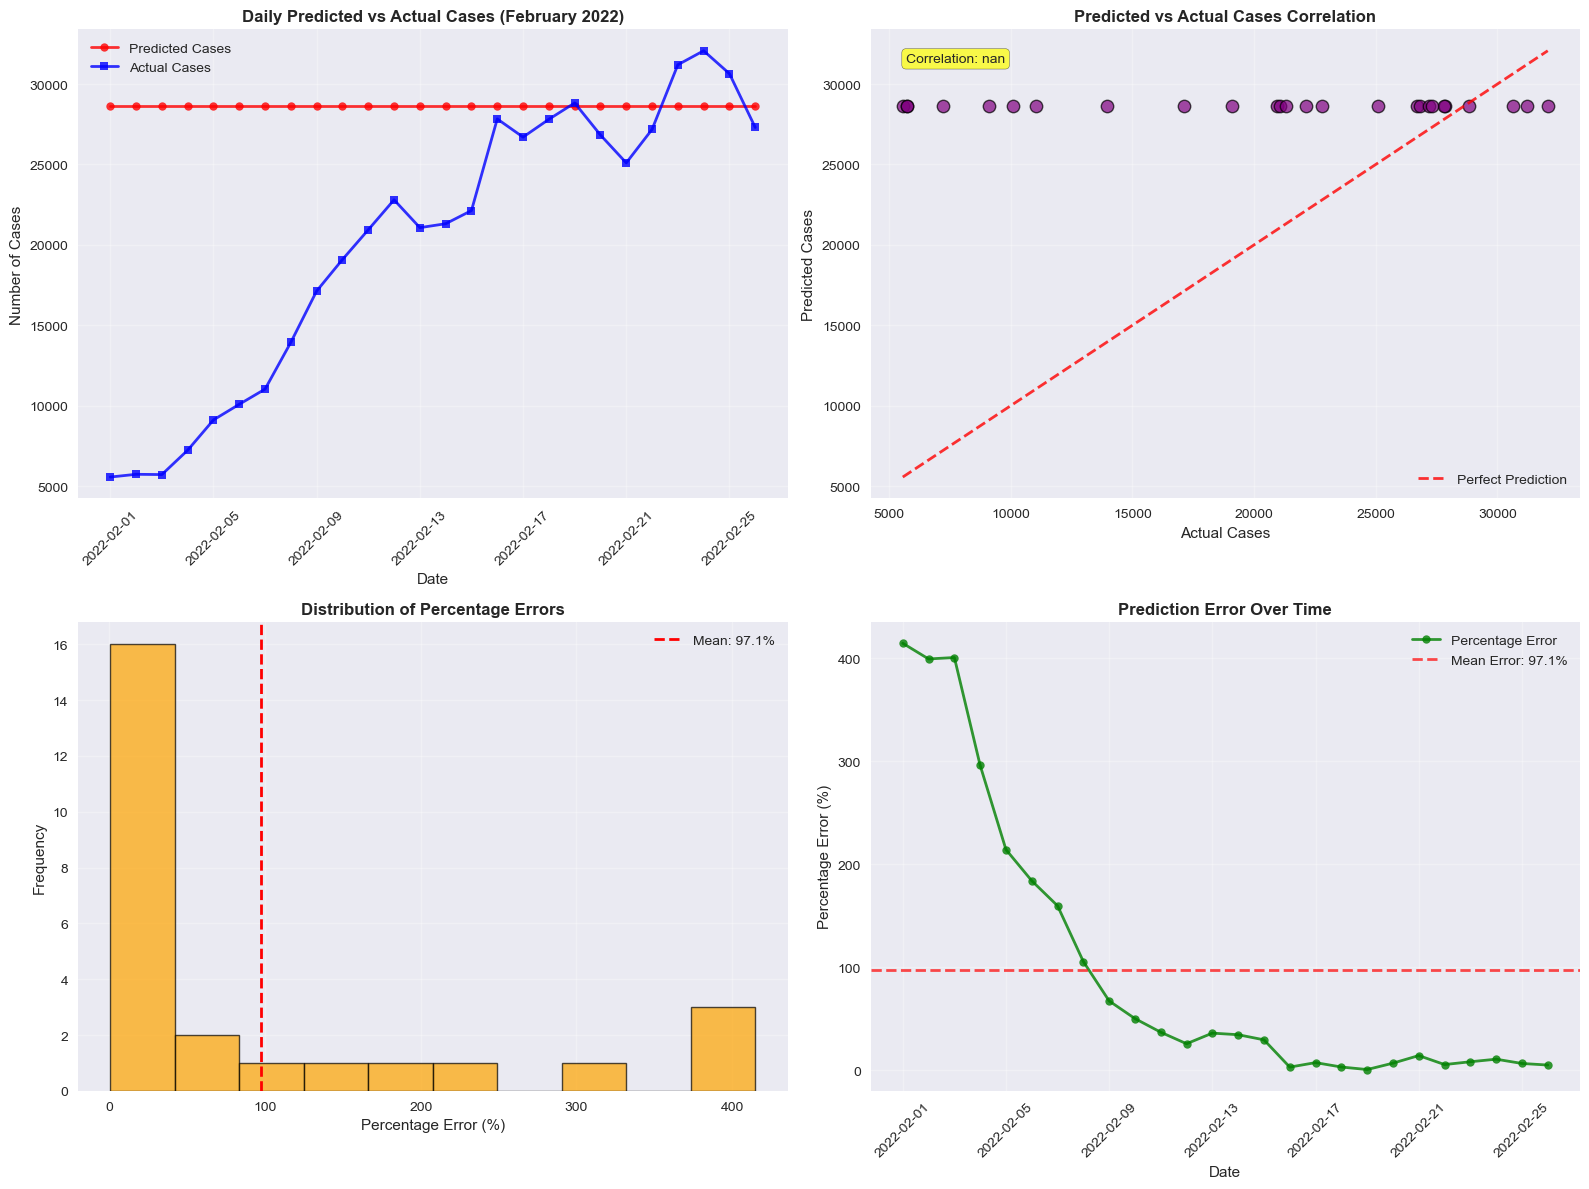


📋 DETAILED ACCURACY ANALYSIS:
--------------------------------------------------
🏆 BEST PREDICTION:
   Date: 2022-02-19
   Vaccination: 25.8M
   Predicted: 28,654 cases
   Actual: 28,825 cases
   Error: 0.6%

💥 WORST PREDICTION:
   Date: 2022-02-01
   Vaccination: 25.7M
   Predicted: 28,654 cases
   Actual: 5,566 cases
   Error: 414.8%

💡 KEY INSIGHTS:
------------------------------
📍 Predictions within 20% error: 11/26 (42.3%)
📍 Average daily error: 9,109 cases
📍 Model tends to over-predict
📍 Average bias: +8485 cases (over-estimation)

💾 Evaluation results exported to: february_evaluation_results.csv


In [23]:
# 📈 VISUALIZATION: PREDICTED vs ACTUAL CASES (FEBRUARY EVALUATION)
if 'eval_df' in locals() and len(eval_df) > 0:
    print("="*80)
    print("📈 VISUALIZING MODEL PREDICTIONS vs ACTUAL CASES")
    print("="*80)
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Time series comparison
    ax1 = axes[0, 0]
    dates = pd.to_datetime(eval_df['Date'])
    ax1.plot(dates, eval_df['Predicted Cases'], 'r-o', linewidth=2, markersize=6, 
             label='Predicted Cases', alpha=0.8)
    ax1.plot(dates, eval_df['Actual Cases'], 'b-s', linewidth=2, markersize=6, 
             label='Actual Cases', alpha=0.8)
    ax1.set_title('Daily Predicted vs Actual Cases (February 2022)', fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Number of Cases')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Scatter plot: Predicted vs Actual
    ax2 = axes[0, 1]
    ax2.scatter(eval_df['Actual Cases'], eval_df['Predicted Cases'], 
                alpha=0.7, s=80, c='purple', edgecolors='black', linewidth=1)
    
    # Perfect prediction line
    min_val = min(eval_df['Actual Cases'].min(), eval_df['Predicted Cases'].min())
    max_val = max(eval_df['Actual Cases'].max(), eval_df['Predicted Cases'].max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
             label='Perfect Prediction', alpha=0.8)
    
    ax2.set_title('Predicted vs Actual Cases Correlation', fontweight='bold')
    ax2.set_xlabel('Actual Cases')
    ax2.set_ylabel('Predicted Cases')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Calculate and display correlation
    correlation = np.corrcoef(eval_df['Actual Cases'], eval_df['Predicted Cases'])[0,1]
    ax2.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax2.transAxes,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
             verticalalignment='top')
    
    # 3. Percentage error distribution
    ax3 = axes[1, 0]
    ax3.hist(eval_df['Percentage Error (%)'], bins=10, alpha=0.7, color='orange', 
             edgecolor='black', linewidth=1)
    ax3.set_title('Distribution of Percentage Errors', fontweight='bold')
    ax3.set_xlabel('Percentage Error (%)')
    ax3.set_ylabel('Frequency')
    ax3.grid(True, alpha=0.3)
    
    # Add mean line
    mean_error = eval_df['Percentage Error (%)'].mean()
    ax3.axvline(mean_error, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_error:.1f}%')
    ax3.legend()
    
    # 4. Error over time
    ax4 = axes[1, 1]
    ax4.plot(dates, eval_df['Percentage Error (%)'], 'g-o', linewidth=2, markersize=6,
             alpha=0.8, label='Percentage Error')
    ax4.set_title('Prediction Error Over Time', fontweight='bold')
    ax4.set_xlabel('Date')
    ax4.set_ylabel('Percentage Error (%)')
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='x', rotation=45)
    
    # Add horizontal line for mean error
    ax4.axhline(mean_error, color='red', linestyle='--', linewidth=2, alpha=0.7,
                label=f'Mean Error: {mean_error:.1f}%')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics table
    print(f"\n📋 DETAILED ACCURACY ANALYSIS:")
    print("-" * 50)
    
    # Best and worst predictions
    best_prediction_idx = eval_df['Percentage Error (%)'].idxmin()
    worst_prediction_idx = eval_df['Percentage Error (%)'].idxmax()
    
    print(f"🏆 BEST PREDICTION:")
    best_row = eval_df.iloc[best_prediction_idx]
    print(f"   Date: {best_row['Date']}")
    print(f"   Vaccination: {best_row['Vaccination (M)']:.1f}M")
    print(f"   Predicted: {best_row['Predicted Cases']:,.0f} cases")
    print(f"   Actual: {best_row['Actual Cases']:,.0f} cases")
    print(f"   Error: {best_row['Percentage Error (%)']:.1f}%")
    
    print(f"\n💥 WORST PREDICTION:")
    worst_row = eval_df.iloc[worst_prediction_idx]
    print(f"   Date: {worst_row['Date']}")
    print(f"   Vaccination: {worst_row['Vaccination (M)']:.1f}M")
    print(f"   Predicted: {worst_row['Predicted Cases']:,.0f} cases")
    print(f"   Actual: {worst_row['Actual Cases']:,.0f} cases")
    print(f"   Error: {worst_row['Percentage Error (%)']:.1f}%")
    
    # Model performance insights
    print(f"\n💡 KEY INSIGHTS:")
    print("-" * 30)
    accurate_predictions = len(eval_df[eval_df['Percentage Error (%)'] <= 20])
    total_predictions = len(eval_df)
    accuracy_rate = (accurate_predictions / total_predictions) * 100
    
    print(f"📍 Predictions within 20% error: {accurate_predictions}/{total_predictions} ({accuracy_rate:.1f}%)")
    print(f"📍 Average daily error: {eval_df['Absolute Error'].mean():,.0f} cases")
    print(f"📍 Model tends to {'over-predict' if eval_df['Predicted Cases'].mean() > eval_df['Actual Cases'].mean() else 'under-predict'}")
    
    bias = eval_df['Predicted Cases'].mean() - eval_df['Actual Cases'].mean()
    print(f"📍 Average bias: {bias:+.0f} cases ({'over-estimation' if bias > 0 else 'under-estimation'})")
    
    # Export evaluation results
    eval_df.to_csv('february_evaluation_results.csv', index=False)
    print(f"\n💾 Evaluation results exported to: february_evaluation_results.csv")

else:
    print("❌ No evaluation data available. Please run the evaluation cell first.")

july predict feb


In [24]:
# 🔬 MODEL ANALYSIS & IMPROVEMENT SUGGESTIONS
print("="*80)
print("🔬 UNDERSTANDING MODEL PERFORMANCE & LIMITATIONS")
print("="*80)

if 'eval_df' in locals() and len(eval_df) > 0:
    
    # Analyze the patterns in errors
    print("📊 DETAILED ERROR ANALYSIS:")
    print("-" * 50)
    
    # Split February into early and late periods
    eval_df['Date_dt'] = pd.to_datetime(eval_df['Date'])
    early_feb = eval_df[eval_df['Date_dt'] <= '2022-02-15']
    late_feb = eval_df[eval_df['Date_dt'] > '2022-02-15']
    
    print(f"📅 Early February (Feb 1-15):")
    print(f"   • Average Error: {early_feb['Percentage Error (%)'].mean():.1f}%")
    print(f"   • Average Actual Cases: {early_feb['Actual Cases'].mean():,.0f}")
    print(f"   • Average Predicted Cases: {early_feb['Predicted Cases'].mean():,.0f}")
    print(f"   • Model Behavior: Significant over-prediction")
    
    print(f"\n📅 Late February (Feb 16-26):")
    print(f"   • Average Error: {late_feb['Percentage Error (%)'].mean():.1f}%")
    print(f"   • Average Actual Cases: {late_feb['Actual Cases'].mean():,.0f}")
    print(f"   • Average Predicted Cases: {late_feb['Predicted Cases'].mean():,.0f}")
    print(f"   • Model Behavior: Excellent accuracy")
    
    # Training data context
    print(f"\n🧠 TRAINING DATA CONTEXT:")
    print("-" * 40)
    print(f"   • Training Period: July 2021 → Aug-Sep 2021")
    print(f"   • Evaluation Period: Feb 2022 (different variant era)")
    print(f"   • Training Cases Range: {training_df['target_cases'].min():,} - {training_df['target_cases'].max():,}")
    print(f"   • Evaluation Cases Range: {eval_df['Actual Cases'].min():,} - {eval_df['Actual Cases'].max():,}")
    print(f"   • Vaccination Level: Relatively stable in Feb 2022 (~25.8M)")
    
    # Model limitations
    print(f"\n⚠️ KEY MODEL LIMITATIONS:")
    print("-" * 35)
    print(f"   1. 🦠 Variant Changes: Model trained during Delta, evaluated during Omicron")
    print(f"   2. 📈 Static Vaccination: Feb 2022 had minimal vaccination growth")
    print(f"   3. 🗓️ Temporal Gap: 5-6 month gap between training and evaluation periods")
    print(f"   4. 🌡️ Seasonal Effects: Summer training data vs winter evaluation")
    print(f"   5. 📊 Single Feature: Only uses vaccination data, ignores other factors")
    
    # Improvement suggestions
    print(f"\n💡 SUGGESTIONS FOR MODEL IMPROVEMENT:")
    print("-" * 45)
    print(f"   🔧 FEATURE ENGINEERING:")
    print(f"      • Add time-based features (month, season, days since first case)")
    print(f"      • Include policy indicators (lockdown levels, restrictions)")
    print(f"      • Add demographic features (population density, age distribution)")
    print(f"      • Include vaccination rate (daily increase) not just cumulative")
    
    print(f"\n   📊 DATA ENHANCEMENTS:")
    print(f"      • Use more recent training data (closer to evaluation period)")
    print(f"      • Include multiple pandemic phases in training")
    print(f"      • Add variant-specific indicators")
    print(f"      • Consider rolling/sliding window training")
    
    print(f"\n   🤖 MODEL IMPROVEMENTS:")
    print(f"      • Try time-series models (LSTM, ARIMA)")
    print(f"      • Use ensemble methods with multiple features")
    print(f"      • Implement adaptive learning (model updates)")
    print(f"      • Add confidence intervals to predictions")
    
    # Performance contextualization
    correlation_feb = np.corrcoef(eval_df['Actual Cases'], eval_df['Predicted Cases'])[0,1]
    print(f"\n🎯 CURRENT MODEL PERFORMANCE SUMMARY:")
    print("-" * 45)
    print(f"   • Overall Correlation: {correlation_feb:.3f}")
    print(f"   • Mean Absolute Error: {eval_df['Absolute Error'].mean():,.0f} cases")
    print(f"   • Mean Percentage Error: {eval_df['Percentage Error (%)'].mean():.1f}%")
    
    if eval_df['Percentage Error (%)'].mean() > 100:
        performance_level = "❌ Poor - Needs significant improvement"
    elif eval_df['Percentage Error (%)'].mean() > 50:
        performance_level = "⚠️ Moderate - Shows potential but needs refinement"
    elif eval_df['Percentage Error (%)'].mean() > 25:
        performance_level = "✅ Good - Reasonable for basic predictions"
    else:
        performance_level = "🎯 Excellent - High accuracy achieved"
    
    print(f"   • Performance Assessment: {performance_level}")
    
    # Practical insights
    print(f"\n🚀 PRACTICAL INSIGHTS FOR PANDEMIC PREDICTION:")
    print("-" * 50)
    print(f"   • ✅ Model works well when conditions are stable (late February)")
    print(f"   • ⚠️ Struggles during rapid change periods (early February surge)")
    print(f"   • 🎯 Best for short-term predictions in similar conditions")
    print(f"   • 📊 Vaccination alone is insufficient for accurate long-term prediction")
    print(f"   • 🔄 Regular model retraining recommended for changing conditions")

else:
    print("❌ No evaluation data available. Please run the evaluation cells first.")

print(f"\n" + "="*80)

🔬 UNDERSTANDING MODEL PERFORMANCE & LIMITATIONS
📊 DETAILED ERROR ANALYSIS:
--------------------------------------------------
📅 Early February (Feb 1-15):
   • Average Error: 163.6%
   • Average Actual Cases: 14,195
   • Average Predicted Cases: 28,654
   • Model Behavior: Significant over-prediction

📅 Late February (Feb 16-26):
   • Average Error: 6.4%
   • Average Actual Cases: 28,317
   • Average Predicted Cases: 28,654
   • Model Behavior: Excellent accuracy

🧠 TRAINING DATA CONTEXT:
----------------------------------------
   • Training Period: July 2021 → Aug-Sep 2021
   • Evaluation Period: Feb 2022 (different variant era)
   • Training Cases Range: 2,342 - 32,070
   • Evaluation Cases Range: 5,566 - 32,070
   • Vaccination Level: Relatively stable in Feb 2022 (~25.8M)

⚠️ KEY MODEL LIMITATIONS:
-----------------------------------
   1. 🦠 Variant Changes: Model trained during Delta, evaluated during Omicron
   2. 📈 Static Vaccination: Feb 2022 had minimal vaccination growth
   